#**Titanic Passenger Survival Prediction**

###**1. Problem Statement**

During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival

###**2. Objectives of the Project**

* Understand passenger survival patterns

* Perform basic data preprocessing

* Conduct minimal but meaningful EDA

* Build binary classification models

* Evaluate model performance

* Identify key survival-influencing features





###**3.Dataset Description**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

###**4.Exploratory Data Analysis (EDA)-Minimal Graph**


####**Graph 1: Survival Count Plot**

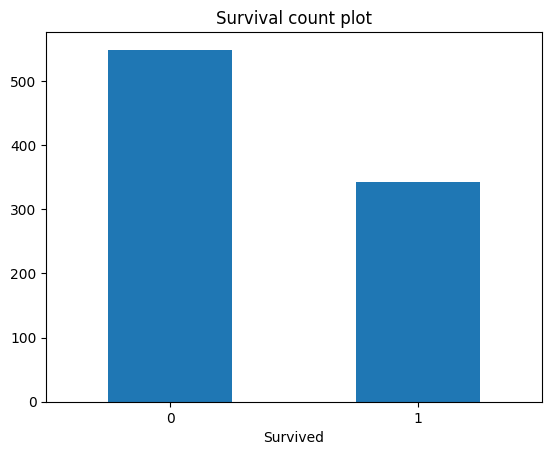

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

survival_counts=df['Survived'].value_counts()

plt.figure()
survival_counts.plot(kind='bar')
plt.xlabel=("Survival status")
plt.ylabel=("Count")
plt.title("Survival count plot")
plt.xticks(rotation=0)
plt.show()


####**Graph 2: Survival by Gender**

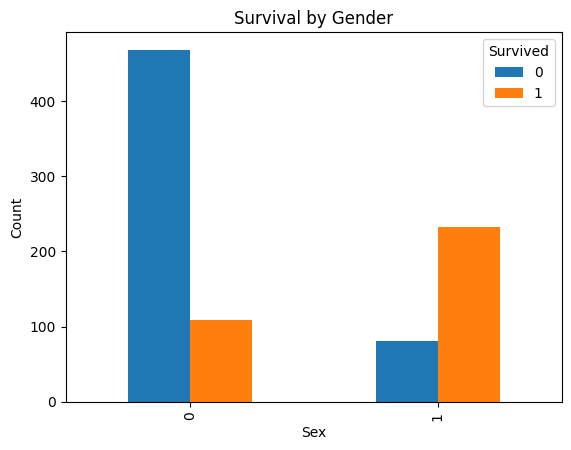

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=ax)
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Survival by Gender")
plt.show()

####**Graph 3: Survival by Passenger Class**

<Figure size 640x480 with 0 Axes>

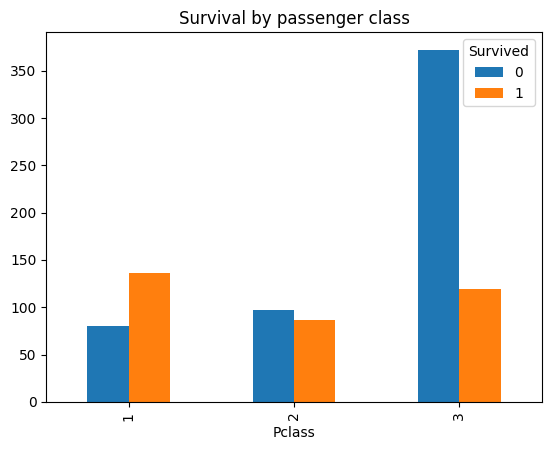

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
class_survival=df.groupby(['Pclass','Survived']).size().unstack()
plt.figure()
class_survival.plot(kind='bar')
plt.xlabel=("Passenger class")
plt.ylabel=("count")
plt.title("Survival by passenger class")
plt.show()

####**Graph 4: Fare vs Survival (Box Plot)**

<Figure size 640x480 with 0 Axes>

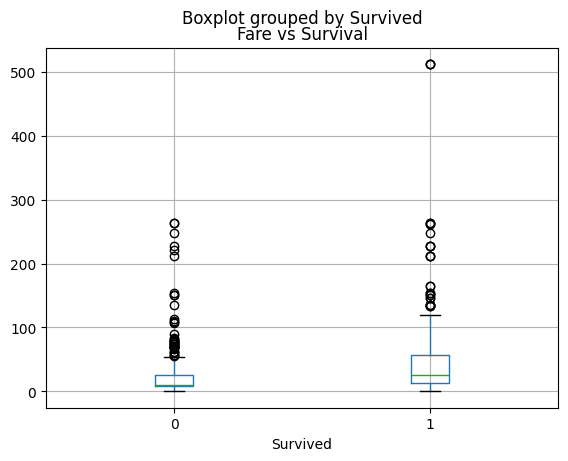

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='Fare',by='Survived')
plt.xlabel=("Survival status")
plt.ylabel=("Fare")
plt.title("Fare vs Survival")

plt.show()

###**5.Machine Learning workflow**

In [49]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (1).csv


In [ ]:
df=pd.read_csv("train.csv")
df.head() #reading 1st 5row

In [ ]:
print(df)

In [ ]:
print("dataset shape:",df.shape)

In [ ]:
df.duplicated()

In [ ]:
# To remove duplicate value
df.drop_duplicates(inplace=True)

In [ ]:
#To find Null values
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
#Handling missing values
#numerical cilumns-->fill with median

num_cols=["PassengerId","Age","Survived","Pclass","Fare"]

#with for loop
for col in num_cols:
  df[col]=df[col].fillna(df[col].median())

print(df)

In [ ]:
#Catagorical columns
cat_cols=["Name","Sex","Embarked"]

#with for loop
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

print(df)

In [ ]:
#Cabin-->fill missing with "unknown"
df['Cabin']=df['Cabin'].fillna('unknown')
print(df)

In [ ]:
# Encoding
# 1)Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Embarked']=le.fit_transform(df['Embarked'])
print(df)

In [ ]:
# 2) Binary Encoding
df['Sex']=df['Sex'].map({"female":1,"male":0})

print(df)

###**6.Models Used**

#####**Logistic Regression**

In [ ]:
# Split the data
X=df[["Age","Embarked","Sex","PassengerId"]] #Features
y=df['Survived'] #Target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

#####**Decision Tree**

In [ ]:
#decision tree model
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)

In [ ]:
#prediction
y_pred=model.predict(X_test)
print("Predict Decision Tree:",y_pred)

In [ ]:
#Find Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

In [ ]:
#prediction
y_pred=model.predict(X_test)
print("Predict Decision Tree:",y_pred)

#####**Random Forest**

In [ ]:
rf=RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

In [ ]:
#Decision tree model
model=RandomForestClassifier()
model.fit(X_train,y_train)

In [ ]:
#prediction
y_pred=model.predict(X_test)
print("Predicted values:",y_pred)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

###**7.Model Evaluation**

In [ ]:
cm = confusion_matrix(y_test, y_pred)

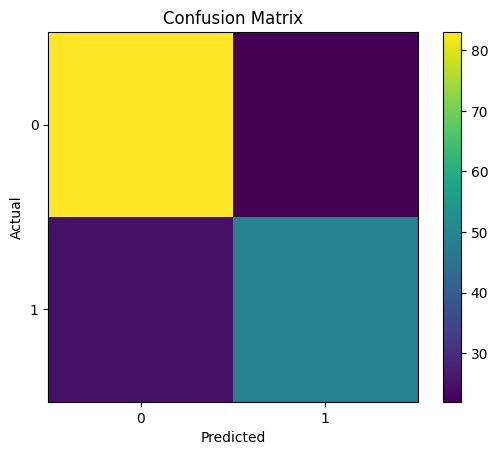

In [50]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
plt.colorbar(ax.images[0])
plt.show()

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

**8.Identifyig Survival -Influencing Factors**

####**Graph 6: Featurs Importance (Random Forest)**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
features=["Pclass","Age","Sex"]
X=df[features]
y=df["Survived"]
model=RandomForestClassifier(
    random_state=42
)
model.fit(X,y)
importance=model.feature_importances_
plt.bar(features,importance)
plt.xlabel=("features")
plt.ylabel=("importance")
plt.title("Feature Importance using Random Forest")
plt.show()